<a href="https://colab.research.google.com/github/gustavohn73/Complete-Python-3-Bootcamp/blob/master/Alura_Mod_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Alura

##Módulo 1 - Pandas e Python

**Objetivo**: Fazer um estudo dos dados abertos sobre COVID do estado de São Paulo das cidades de **Colina** e **Barretos** nos anos de **2020** e **2021**

In [4]:
import pandas as pd

pd.options.display.float_format = "{:.2f}".format

Usando o Google Drive para armazenar os dados e não precisar ficar subindo toda vez que o caderno é reiniciado

Extraindo arquivo Zip (menor para fazer upload)

In [2]:
# importar zipfile
from zipfile import ZipFile
  
# carregar arquivo
file_name = "/content/drive/MyDrive/Covid/20210531_Casos-e-obitos-ESP.zip"

# Fazer extração
#with ZipFile(file_name, 'r') as zip:
    #Caso esteja local
    #zip.extract()
    # leitura dos dados de casos local
    #dados_casos = pd.read_csv("/content/20210531_Casos-e-obitos-ESP.csv", encoding="UTF-8", skiprows = 0, sep=";", skipfooter=0, thousands=".", decimal=",")


In [5]:
#leitura dos dados no Google Drive

dados_casos = pd.read_csv( file_name, encoding="UTF-8", skiprows = 0, sep=";", skipfooter=0, thousands=".", decimal=",")

In [6]:
dados_casos.head()

,Genero,Municipio,Asma,Diabetes,Cardiopatia,Doenca Hematologica,Doenca Hepatica,Doenca Neurologica,Doenca Renal,Imunodepressao,Obesidade,Pneumopatia,Puérpera,Síndrome De Down,Outros Fatores De Risco,Diagnostico Covid19,Data Inicio Sintomas,Idade,Obito
0,FEMININO,FRANCISCO MORATO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,20/05/2021,17.00,0
1,FEMININO,SÃO PAULO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,05/02/2021,35.00,0
2,FEMININO,SÃO PAULO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,14/03/2021,33.00,0
3,FEMININO,VINHEDO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,13/02/2021,21.00,0
4,FEMININO,OSVALDO CRUZ,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO,21/04/2021,18.00,0


In [7]:
#Leitura de dados SRAG

dados_srag = pd.read_csv("/content/drive/MyDrive/Covid/20210528_SRAG.csv", encoding="UTF-8", 
                    skiprows = 0, sep=";", skipfooter=0)

In [8]:
dados_srag.head()

,Municípios,Sg Uf,Nu Idade N,Grupo de Idades,Cs Sexo,Cs Raca,OUTRAS SRAG,Evolução,Quantidade Homens,Quantidade Mulheres,Quantidade de Casos,Cs Raca_ID,Cs Sexo_ID,Data de Notificação,Faixa etária,EVOLUCAO_NOT_NULL,Última Data de Notificação
0,SAO PAULO,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,08/08/2020,70,1,29/09/2020
1,HORTOLANDIA,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,11/08/2020,70,1,29/09/2020
2,SAO PAULO,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,12/08/2020,70,1,29/09/2020
3,CARAGUATATUBA,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,14/08/2020,70,1,29/09/2020
4,GUARULHOS,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,19/08/2020,70,1,29/09/2020


In [9]:
#Leitura de dados isolamento

dados_iso = pd.read_csv("/content/drive/MyDrive/Covid/20210530_isolamento-1.csv", encoding="UTF-8", 
                    skiprows = 0, sep=";", skipfooter=0,
                    thousands=".", decimal=",")
dados_iso.head()

,Município1,Código Município IBGE,População estimada (2020),UF1,Data,Média de Índice De Isolamento
0,AMERICANA,3501608,242018,SP,"sábado, 29/05",40%
1,AMERICANA,3501608,242018,SP,"sexta-feira, 28/05",36%
2,AMERICANA,3501608,242018,SP,"quinta-feira, 27/05",37%
3,AMERICANA,3501608,242018,SP,"quarta-feira, 26/05",38%
4,AMERICANA,3501608,242018,SP,"terça-feira, 25/05",36%


##Trabalhando com Datetime

In [10]:
import datetime

In [92]:
dados_srag["Data de Notificação"] = pd.to_datetime(dados_srag["Data de Notificação"], format="%d/%m/%Y", errors="ignore")


#dados_srag.index =  pd.to_datetime(dados_srag["Data de Notificação"], format="%d/%m/%Y", errors="ignore")

In [12]:
dados_srag.head()

,Municípios,Sg Uf,Nu Idade N,Grupo de Idades,Cs Sexo,Cs Raca,OUTRAS SRAG,Evolução,Quantidade Homens,Quantidade Mulheres,Quantidade de Casos,Cs Raca_ID,Cs Sexo_ID,Data de Notificação,Faixa etária,EVOLUCAO_NOT_NULL,Última Data de Notificação
0,SAO PAULO,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,2020-08-08,70,1,29/09/2020
1,HORTOLANDIA,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,2020-08-11,70,1,29/09/2020
2,SAO PAULO,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,2020-08-12,70,1,29/09/2020
3,CARAGUATATUBA,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,2020-08-14,70,1,29/09/2020
4,GUARULHOS,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,2020-08-19,70,1,29/09/2020


#Contagem

In [13]:
#para fazer a contagem de tamanho.
dados_srag.groupby("Data de Notificação").size()

Data de Notificação
2011-03-18       1
2012-04-20       1
2017-03-16       1
2018-10-09       1
2018-11-18       1
              ... 
2021-05-23    1146
2021-05-24    2451
2021-05-25    2075
2021-05-26    1738
2021-05-27    1332
Length: 894, dtype: int64

#Filtro de Ano


In [95]:
#Garantindo que o dado seja relativo aos anos de 2020 e 2021 (fazeendo com append para usar a função)
srag_filtered = dados_srag[dados_srag["Data de Notificação"].dt.strftime('%Y') == "2021"]
srag_filtered_2020 = dados_srag[dados_srag["Data de Notificação"].dt.strftime('%Y') == "2020"]
srag_filtered.append(srag_filtered_2020)

,Municípios,Sg Uf,Nu Idade N,Grupo de Idades,Cs Sexo,Cs Raca,OUTRAS SRAG,Evolução,Quantidade Homens,Quantidade Mulheres,Quantidade de Casos,Cs Raca_ID,Cs Sexo_ID,Data de Notificação,Faixa etária,EVOLUCAO_NOT_NULL,Última Data de Notificação
18,APARECIDA,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,2021-01-07,70,1,29/09/2020
19,GUARULHOS,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,2021-01-08,70,1,29/09/2020
20,AMPARO,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,2021-01-24,70,1,29/09/2020
21,BARUERI,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,2021-01-24,70,1,29/09/2020
22,CARAPICUIBA,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,2021-01-25,70,1,29/09/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645340,SANTA BARBARA D'OESTE,SP,67,65,Feminino,Parda,COVID 19,Cura,nan,67.00,1,4.00,Feminino,2020-06-29,65,1,29/09/2020
645341,SAO PAULO,SP,67,65,Feminino,Parda,COVID 19,Cura,nan,67.00,1,4.00,Feminino,2020-06-29,65,1,29/09/2020
645342,VOTUPORANGA,SP,67,65,Feminino,Parda,COVID 19,Cura,nan,67.00,1,4.00,Feminino,2020-06-29,65,1,29/09/2020
645343,CARAPICUIBA,SP,67,65,Feminino,Parda,COVID 19,Cura,nan,67.00,1,4.00,Feminino,2020-07-01,65,1,29/09/2020


#Agrupamento

In [15]:
srag_filtered.groupby("Municípios").size()

Municípios
ABDON BATISTA      1
ABREU E LIMA       1
ACAILANDIA         1
ACARAU             2
ACARI              1
                ... 
VOTORANTIM       914
VOTUPORANGA      701
XAPURI             1
XINGUARA           3
ZACARIAS          16
Length: 1172, dtype: int64

In [16]:
srag_filtered.loc[(srag_filtered.Municípios == "COLINA")].groupby("Evolução").size()

Evolução
Cura            72
Em avaliação    38
Óbito           24
dtype: int64

In [99]:
#verificando quantidade de dados por ano.
dados_srag['ano'] = dados_estudo["Data de Notificação"].dt.year
dados_srag.loc[(dados_srag.Municípios == "COLINA") | (dados_srag.Municípios == "BARRETOS") ].groupby("ano").size()

ano
2021.00    490
dtype: int64

#Trabalhando os dados

In [96]:
#Para colocar as duas cidadades posso usar o append

#dados_estudo_Colina = srag_filtered.loc[(srag_filtered.Municípios == "COLINA")]
#dados_estudo = srag_filtered.loc[(srag_filtered.Municípios == "BARRETOS")]
#dados_estudo.append(dados_estudo_Colina)

#Ou posso usar o "|" para fazer o OR (se tivesse que ser nas duas ao mesmo tempo usa-se o "&"no filtro) menor e mais facil.
dados_estudo = srag_filtered.loc[(srag_filtered.Municípios == "COLINA") | (srag_filtered.Municípios == "BARRETOS")]

#Arrumar o nome da coluna OUTRAS SRAG
dados_estudo = dados_estudo.rename(columns={'OUTRAS SRAG': 'srag'})

#filtrar de SRAG para COVID
dados_estudo = dados_estudo.loc[(dados_estudo.srag == "COVID 19")]

#filtrar de Evolução
dados_estudo = dados_estudo.loc[(dados_estudo.Evolução != "Em avaliação")]


#colocar mes e ano
dados_estudo['ano'] = dados_estudo["Data de Notificação"].dt.year
dados_estudo['mes'] = dados_estudo["Data de Notificação"].dt.month
dados_estudo['mes_ano'] = dados_estudo["Data de Notificação"].dt.strftime('%b/%Y')

dados_estudo

,Municípios,Sg Uf,Nu Idade N,Grupo de Idades,Cs Sexo,Cs Raca,srag,Evolução,Quantidade Homens,Quantidade Mulheres,Quantidade de Casos,Cs Raca_ID,Cs Sexo_ID,Data de Notificação,Faixa etária,EVOLUCAO_NOT_NULL,Última Data de Notificação,ano,mes,mes_ano
25,BARRETOS,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,2021-02-06,70,1,29/09/2020,2021,2,Feb/2021
945,BARRETOS,SP,75,75,Feminino,Parda,COVID 19,Cura,nan,75.00,1,4.00,Feminino,2021-03-30,75,1,29/09/2020,2021,3,Mar/2021
23383,BARRETOS,SP,45,45,Feminino,Não informado,COVID 19,Cura,nan,45.00,1,9.00,Feminino,2021-04-06,45,1,29/09/2020,2021,4,Apr/2021
24994,BARRETOS,SP,21,20,Feminino,Branca,COVID 19,Cura,nan,21.00,1,1.00,Feminino,2021-03-31,20,1,29/09/2020,2021,3,Mar/2021
25252,BARRETOS,SP,26,25,Feminino,Branca,COVID 19,Cura,nan,26.00,1,1.00,Feminino,2021-05-02,25,1,29/09/2020,2021,5,May/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635862,COLINA,SP,59,55,Masculino,Não informado,COVID 19,Óbito,59.00,nan,1,9.00,Masculino,2021-04-07,55,2,29/09/2020,2021,4,Apr/2021
636083,BARRETOS,SP,65,65,Masculino,Não informado,COVID 19,Óbito,65.00,nan,1,9.00,Masculino,2021-04-12,65,2,29/09/2020,2021,4,Apr/2021
640458,BARRETOS,SP,82,80,Feminino,Branca,COVID 19,Cura,nan,82.00,1,1.00,Feminino,2021-04-11,80,1,29/09/2020,2021,4,Apr/2021
641747,BARRETOS,SP,55,55,Feminino,Preta,COVID 19,Cura,nan,55.00,1,2.00,Feminino,2021-05-19,55,1,29/09/2020,2021,5,May/2021


In [104]:
cb_dados = dados_estudo.loc[(dados_estudo.srag == "COVID 19")].groupby(["Municípios", "mes","Evolução"]).agg({'Quantidade de Casos': ['sum']})
cb_dados.columns = ['Qtd Casos Total']
cb_dados = cb_dados.reset_index()
cb_dados


,Municípios,mes,Evolução,Qtd Casos Total
0,BARRETOS,1,Cura,42
1,BARRETOS,1,Óbito,27
2,BARRETOS,2,Cura,43
3,BARRETOS,2,Óbito,25
4,BARRETOS,3,Cura,40
5,BARRETOS,3,Óbito,53
6,BARRETOS,4,Cura,62
7,BARRETOS,4,Óbito,65
8,BARRETOS,5,Cura,30
9,BARRETOS,5,Óbito,36


In [100]:
#importando as bibliotecas

import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

#DESAFIOS


##Aula 1

###Desafio 01: Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.

Text(0.5, 1.0, 'Óbitos em Barretos por mês no ano de 2021')

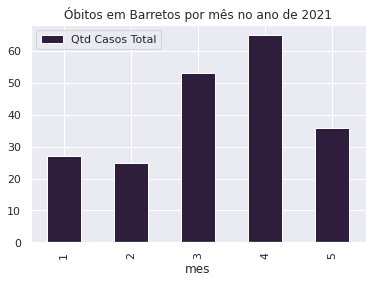

In [108]:
cb_dados.loc[(cb_dados.Municípios == "BARRETOS") & (cb_dados.Evolução == "Óbito")].plot(x="mes", y="Qtd Casos Total", kind="bar")
plt.title("Óbitos em Barretos por mês no ano de 2021")

### Desafio 02: Faça a mesma análise realizada em aula, porém para o mês mais recente.

Feito durante as aulas e refeito usando uma nova base de dados.

##Aula 2

###Desafio 01: Reposicionar a legenda do gráfico em uma posição mais adequada

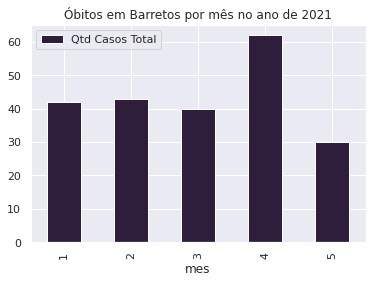

In [109]:


cb_dados.loc[(cb_dados.Municípios == "BARRETOS") & (cb_dados.Evolução == "Cura")].plot(x="mes", y="Qtd Casos Total", kind="bar")
plt.title("Óbitos em Barretos por mês no ano de 2021")
#a posição 0 (best) seria a mesma escolhida por mim, que é a posição 2 (upper left)
plt.legend(loc = 2)

###Desafio 02: Plotar o gráfico de linha com apenas 5 estados de sua preferência

Eu já havia filtrado previamente os dados de meu interesse e os armazenei em um tabela (cb_dados) que usei para plotar os gráficos anteriros.

##Aula 3

###Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.

In [112]:
#criar tabela com os dados de Colina e Barretos
b = dados_estudo.loc[(dados_estudo.srag == "COVID 19") & (dados_estudo.Municípios == "BARRETOS") & (dados_estudo.Evolução == "Cura")].groupby(["mes"]).agg({'Quantidade de Casos': ['sum']})
b.columns = ['Barretos']
c = dados_estudo.loc[(dados_estudo.srag == "COVID 19") & (dados_estudo.Municípios == "COLINA") & (dados_estudo.Evolução == "Cura")].groupby(["mes"]).agg({'Quantidade de Casos': ['sum']})
c.columns = ['Colina']
m = b.index

b = b.T
c = c.T
b = b.append(c)

b = b.T



In [202]:
#criar tabela com os dados de Colina e Barretos
b = dados_estudo.loc[(dados_estudo.srag == "COVID 19") & (dados_estudo.Municípios == "BARRETOS")].groupby(["mes", "mes_ano", "Evolução"]).agg({'Quantidade de Casos': ['sum']})
b.columns = ['Barretos']
c = dados_estudo.loc[(dados_estudo.srag == "COVID 19") & (dados_estudo.Municípios == "COLINA")].groupby(["mes", "mes_ano", "Evolução"]).agg({'Quantidade de Casos': ['sum']})
c.columns = ['Colina']
m = b.index

b = b.T
c = c.T
b = b.append(c)

b = b.T

In [158]:
#drop mes (usado apenas para organizar os dados)
b = b.reset_index(level = "mes", drop=True)



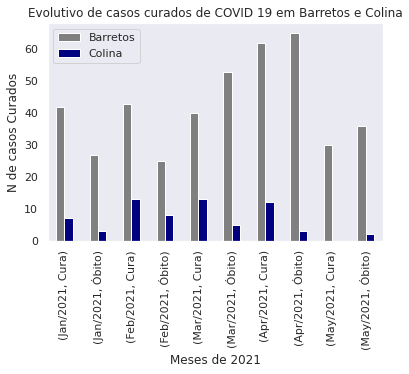

In [160]:
# Plotar o grafico
b.plot( kind="bar", color = ("gray", "navy"))
plt.title("Evolutivo de casos curados de COVID 19 em Barretos e Colina")
plt.xlabel('Meses de 2021')
plt.ylabel('N de casos Curados')
plt.grid(False)
plt.legend(loc = 2)

###Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)



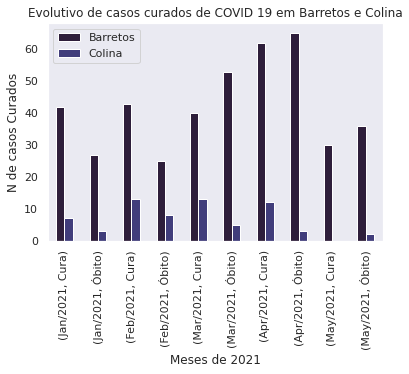

In [161]:
import seaborn as sns

#
sns.set_palette("mako")

# Plotar o grafico
b.plot( kind="bar")
plt.title("Evolutivo de casos curados de COVID 19 em Barretos e Colina")
plt.xlabel('Meses de 2021')
plt.ylabel('N de casos Curados')
plt.grid(False)
plt.legend(loc = 2)

###Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente

Exercício não necessário, já que estou usando outra base e já fiz isso.

###Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

Bases diferentes, exercícios não necessário.

###Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

In [163]:
b = b.T
b

Barretos  Colina
mes_ano  Evolução                  
Jan/2021 Cura         42.00    7.00
         Óbito        27.00    3.00
Feb/2021 Cura         43.00   13.00
         Óbito        25.00    8.00
Mar/2021 Cura         40.00   13.00
         Óbito        53.00    5.00
Apr/2021 Cura         62.00   12.00
         Óbito        65.00    3.00
May/2021 Cura         30.00     nan
         Óbito        36.00    2.00

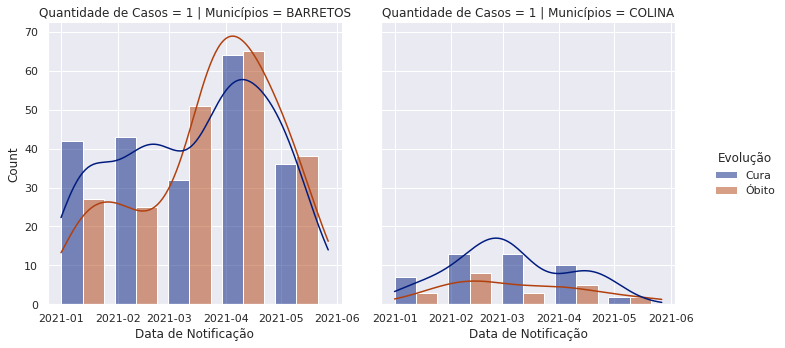

In [227]:
sns.displot(data=dados_estudo, x="Data de Notificação", row ="Quantidade de Casos", col="Municípios", hue = "Evolução", kind = 'hist', multiple="dodge", shrink=.8, bins = 5, kde = True, palette = "dark")


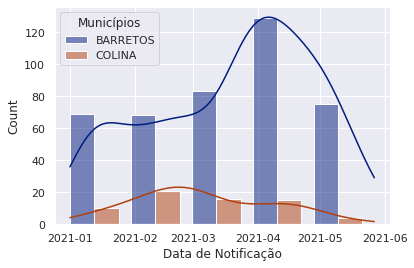

In [222]:
sns.histplot(data=dados_estudo, x="Data de Notificação", bins=5, kde=True, hue ="Municípios", palette = "dark", multiple="dodge", shrink=.8)

In [199]:
#reset de index
#b = b.reset_index()
b

,Evolução,mes_ano,Barretos,Colina
0,Cura,Jan/2021,42.00,7.00
1,Óbito,Jan/2021,27.00,3.00
2,Cura,Feb/2021,43.00,13.00
3,Óbito,Feb/2021,25.00,8.00
4,Cura,Mar/2021,40.00,13.00
5,Óbito,Mar/2021,53.00,5.00
6,Cura,Apr/2021,62.00,12.00
7,Óbito,Apr/2021,65.00,3.00
8,Cura,May/2021,30.00,nan
9,Óbito,May/2021,36.00,2.00


###Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

In [228]:
dados_estudo

,Municípios,Sg Uf,Nu Idade N,Grupo de Idades,Cs Sexo,Cs Raca,srag,Evolução,Quantidade Homens,Quantidade Mulheres,Quantidade de Casos,Cs Raca_ID,Cs Sexo_ID,Data de Notificação,Faixa etária,EVOLUCAO_NOT_NULL,Última Data de Notificação,ano,mes,mes_ano
25,BARRETOS,SP,71,70,Feminino,Parda,COVID 19,Cura,nan,71.00,1,4.00,Feminino,2021-02-06,70,1,29/09/2020,2021,2,Feb/2021
945,BARRETOS,SP,75,75,Feminino,Parda,COVID 19,Cura,nan,75.00,1,4.00,Feminino,2021-03-30,75,1,29/09/2020,2021,3,Mar/2021
23383,BARRETOS,SP,45,45,Feminino,Não informado,COVID 19,Cura,nan,45.00,1,9.00,Feminino,2021-04-06,45,1,29/09/2020,2021,4,Apr/2021
24994,BARRETOS,SP,21,20,Feminino,Branca,COVID 19,Cura,nan,21.00,1,1.00,Feminino,2021-03-31,20,1,29/09/2020,2021,3,Mar/2021
25252,BARRETOS,SP,26,25,Feminino,Branca,COVID 19,Cura,nan,26.00,1,1.00,Feminino,2021-05-02,25,1,29/09/2020,2021,5,May/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635862,COLINA,SP,59,55,Masculino,Não informado,COVID 19,Óbito,59.00,nan,1,9.00,Masculino,2021-04-07,55,2,29/09/2020,2021,4,Apr/2021
636083,BARRETOS,SP,65,65,Masculino,Não informado,COVID 19,Óbito,65.00,nan,1,9.00,Masculino,2021-04-12,65,2,29/09/2020,2021,4,Apr/2021
640458,BARRETOS,SP,82,80,Feminino,Branca,COVID 19,Cura,nan,82.00,1,1.00,Feminino,2021-04-11,80,1,29/09/2020,2021,4,Apr/2021
641747,BARRETOS,SP,55,55,Feminino,Preta,COVID 19,Cura,nan,55.00,1,2.00,Feminino,2021-05-19,55,1,29/09/2020,2021,5,May/2021


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


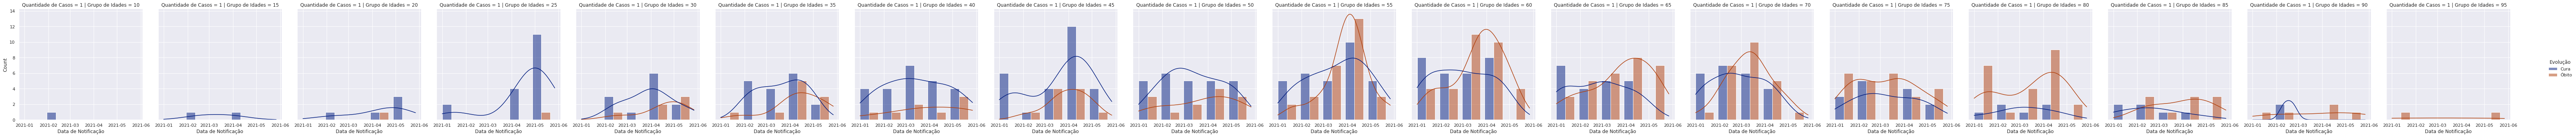

In [233]:
sns.displot(data=dados_estudo, x="Data de Notificação", row ="Quantidade de Casos", col ="Grupo de Idades", hue = "Evolução", kind = 'hist', multiple="dodge", shrink=.8, bins = 5, kde = True, palette = "dark")
